# F20DL Coursework Group 8 2023-24

### Group 8 Members:
- Madihah Anaum
- Tanisha Kasar
- Sneha Sunny
- Dhruv Raghu
- Moses Varghese

# Part 1. Data Analysis and Bayes Nets

## Content
- Coursework Title
- Group Info
- Theory
- Part 1 Study on Given Data Set (Traffic Signs Data)
    - Visualization and Initial Data Exploration
    - Naïve Bayes Classifier
    - Create 3 Data Sets Based on Correlated Features
    - Naïve Bayes Classifier on 3 Data Sets
    - Non-Naïve Bayes Classifier
- Final Thoughts

## Theory

### Bayes Theorem & Naive Bayes

#### What is Bayes Theorem?

Bayes' Theorem or Bayes' Rule is a fundamental concept in probability theory that explains how to calculate conditional probability, i.e., the probability of an event occurring based on prior knowledge of related events. For example, the probability of heart disease significantly increases with high cholesterol levels.

Bayes’ Theorem is expressed as follows:

$$
P(A|B) = \frac{P(A) * P(B|A)}{P(B)}
$$

- $P(A|B)$ is the probability of event $A$ occurring given that event $B$ has occurred.
- Similarly, $P(B|A)$ is the probability of event $B$ occurring given that event $A$ has occurred.
- $P(A)$ and $P(B)$ represent the probabilities of events $A$ and $B$ occurring individually.
- In the context of machine learning, $P(A)$ represents our initial belief in event $A$ and $P(A|B)$ represents our updated belief in event $A$ given some new information in event $B$.

#### Naive Bayes

Naive Bayes is a classification algorithm based on the principles of Bayes’ Theorem. The step-by-step process for Naive Bayes is as follows:

**Training**

- The prior probabilities of each class $[P(A), P(B), etc.]$ are calculated based on the training data.
- For each feature in the dataset $(x_i)$, the likelihood for each class $[P(x_i|A), P(x_i|B), etc.]$ is calculated. The likelihood represents the probability of finding a certain feature given the class.

**Prediction**

- For a new data point with features $x_1, x_2, ... x_n$, calculate the posterior probabilities $P(A|x_1,x_2,...x_n), P(B|x_1,x_2,...x_n), etc.$
- Make a classification based on the highest posterior probability.

The ‘Naive’ part in Naive Bayes comes from the assumption that the features are conditionally independent given the class. This is generally not the case when it comes to real-world datasets, however, it simplifies the calculation of likelihood terms making the algorithm computationally efficient while still performing quite well in many practical applications.

There are different variations of Naive Bayes which are tailored to different types of data and their distributions. Some of them include Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes. 

#### Naive Bayes in Scikit-Learn

The Naive Bayes module in Scikit-Learn provides users with different variations of the Naive Bayes classification algorithm.

1.  **Bernoulli Naive Bayes** (`naive_bayes.BernoulliNB`)
    - Suitable for binary data where features indicate the absence or presence of the feature
    - Often used in document classification or spam detection.
2. **Categorical Naive Bayes** (`naive_bayes.CategoricalNB`)
    - Suitable for classification tasks that involve categorical data rather than binary or continuous data.
3. **Complement Naive Bayes** (`naive_bayes.ComplementNB`)
    - Specifically designed for imbalanced datasets, where one class significantly outnumbers the others.
    - Useful in text classification and spam detection
4. **Gaussian Naive Bayes** (`naive_bayes.GaussianNB`)
    - Assumes that features are continuous and assumes a Gaussian distribution for each class.
    - Not suitable for data with discrete or categorical features.
5. **Multinomial Naive Bayes** (`naive_bayes.MultinomialNB`)
    - Appropriate for data with discrete features
    - Often used in natural language processing tasks

## Part 1 Study on Given Data Set (Traffic Signs Data)

### Visualization and Initial Data Exploration

In [1]:
# import basic libaries
import numpy as np
import pandas as pd

# libraries for data visualization
import matplotlib.pyplot as plt
import cv2

# import modules for the first study: Naive Bayes Classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
# a custom method for training a variant of a naive bayes classifier
def naive_bayes_classification(model_type, X_train, y_train, X_test, y_test, roc_check=True, clasf_reprt=True, tpfp_check=True):
    """
    trains a specified model with user specified data and then
    prints out the perfomance metric results of the classification
    """
    if model_type == 'GaussianNB':
        clf = GaussianNB()
    elif model_type == 'BernoulliNB':
        clf = BernoulliNB()
    elif model_type == 'MultinomialNB':
        clf = MultinomialNB()
    elif model_type == 'ComplementNB':
        clf = ComplementNB()
    elif model_type == 'CategoricalNB':
        clf = CategoricalNB()
    else:
        raise ValueError("Invalid model type. Supported types: 'Naive Bayes', 'Logistic Regression', 'SVM'")
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # print performance metrics
    if clasf_reprt is True:
        print(classification_report(y_test, y_pred, zero_division=False))
    
    print(f'accuracy             : {metrics.accuracy_score(y_test, y_pred):.5f}')

    print(f'precision (micro)    : {metrics.precision_score(y_test, y_pred, average="micro", zero_division=False):.5f}')
    print(f'precision (macro)    : {metrics.precision_score(y_test, y_pred, average="macro", zero_division=False):.5f}')
    print(f'precision (weighted) : {metrics.precision_score(y_test, y_pred, average="weighted", zero_division=False):.5f}')

    print(f'recall (micro)       : {metrics.recall_score(y_test, y_pred, average="micro", zero_division=False):.5f}')
    print(f'recall (macro)       : {metrics.recall_score(y_test, y_pred, average="macro", zero_division=False):.5f}')
    print(f'recall (weighted)    : {metrics.recall_score(y_test, y_pred, average="weighted", zero_division=False):.5f}')

    print(f'F1 score (micro)     : {metrics.f1_score(y_test, y_pred, average="micro", zero_division=False):.5f}')
    print(f'F1 score (macro)     : {metrics.f1_score(y_test, y_pred, average="macro", zero_division=False):.5f}')
    print(f'F1 score (weighted)  : {metrics.f1_score(y_test, y_pred, average="weighted", zero_division=False):.5f}')

    # ROC
    y_score = clf.predict_proba(X_test)
    if roc_check is True:
        print(f'ROC AUC score (ovo)  : {metrics.roc_auc_score(y_test, y_score, multi_class="ovo"):.5f}')
        print(f'ROC AUC score (ovr)  : {metrics.roc_auc_score(y_test, y_score, multi_class="ovr"):.5f}')
    
    if tpfp_check is True:
        # TP FP TN FN
        conf_matrix = metrics.confusion_matrix(y_test, y_pred)
        # True Positive Rate (Sensitivity/Recall)
        tp_rate = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
        # False Positive Rate
        fp_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        print(f"True Positive Rate   : {tp_rate}")
        print(f"False Positive Rate  : {fp_rate}")

In [3]:
def run_all_naive_bayes_models(X_train, X_test, y_train, y_test, roc_check=True):
    """
    runs all the naive bayes models with given X and y data and then prints
    the performance metrics of each naive bayes variant

    all model performances can easily be evaluated and compared
    """
    print("\n\nGaussianNB")
    naive_bayes_classification(model_type="GaussianNB", 
                               X_train=X_train, 
                               y_train=y_train, 
                               X_test=X_test, 
                               y_test=y_test, 
                               roc_check=roc_check)

    print("\n\nMultinomialNB")
    naive_bayes_classification(model_type="MultinomialNB", 
                               X_train=X_train, 
                               y_train=y_train, 
                               X_test=X_test, 
                               y_test=y_test, 
                               roc_check=roc_check)

    print("\n\nComplementNB")
    naive_bayes_classification(model_type="ComplementNB", 
                               X_train=X_train, 
                               y_train=y_train, 
                               X_test=X_test, 
                               y_test=y_test, 
                               roc_check=roc_check)

    print("\n\nBernoulliNB")
    naive_bayes_classification(model_type="BernoulliNB",
                               X_train=X_train, 
                               y_train=y_train, 
                               X_test=X_test, 
                               y_test=y_test, 
                               roc_check=roc_check)

    print("\n\nCategoricalNB")
    naive_bayes_classification(model_type="CategoricalNB",
                               X_train=X_train, 
                               y_train=y_train, 
                               X_test=X_test, 
                               y_test=y_test, 
                               roc_check=roc_check)

In [4]:
# read the coursework data set
X_train = pd.read_csv("data/Traffic_Sign/CompleteDataSet/x_train_all.csv")
y_train = pd.read_csv("data/Traffic_Sign/CompleteDataSet/y_train_all.csv")

In [15]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [16]:
y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [17]:
# view the first and last 5 rows
X_train

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,35.0,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,37.0,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,41.0,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,38.0,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0


In [19]:
# view the first and last 5 rows
y_train

,0
0,0
1,0
2,0
3,0
4,0
...,...
9685,9
9686,9
9687,9
9688,9


In [20]:
# visualize the data using PCA reduction to 2 dimensions

# import libraries for various visualization methods
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

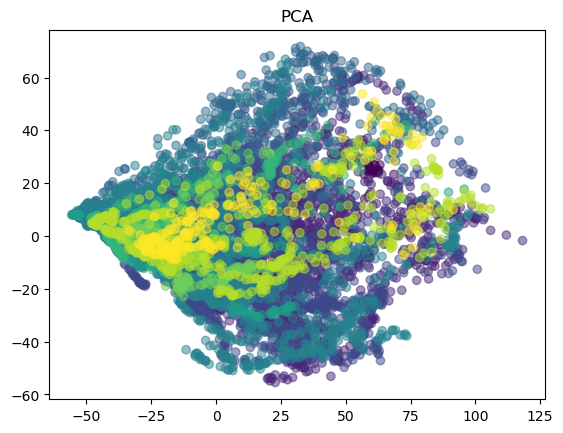

In [21]:
# visualization method: Principle Component Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train.values, cmap='viridis', alpha=0.5)
plt.title('PCA')
plt.show()


This may not be an accuarate visualization of the data and the way the classes are split becuase PCA may get rid of some of the information. However, it is a good way to get a general idea of the data.

In [22]:
class_mapping = {0: 'speed limit 20', 1: 'speed limit 30', 2: 'speed limit 50', 3: 'speed limit 60', 
                 4: 'speed limit 70', 5: 'left turn', 6: 'right turn', 7: 'beware pedestrian crossing', 
                 8: 'beware children', 9: 'beware cycle route ahead'}

# Map the class labels
target_mapped = y_train.applymap(class_mapping.get)
data = pd.concat([y_train, target_mapped], axis=1)

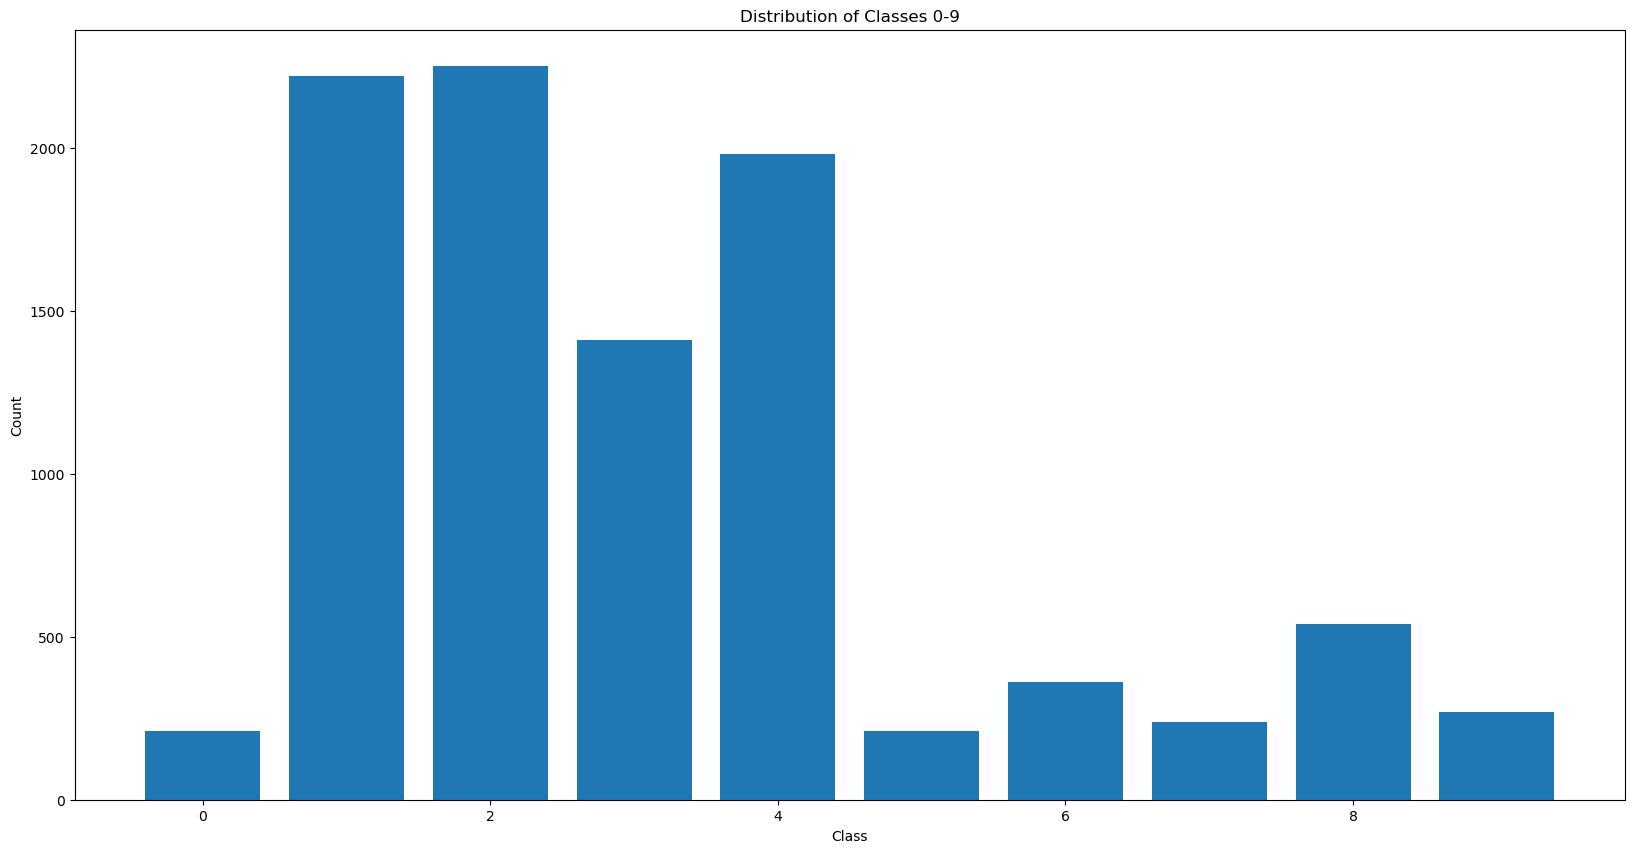

In [23]:
# show the distribution of the target class data

class_counts = data.iloc[:, 0].value_counts()
# Plot the distribution
plt.figure(figsize=(20, 10))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes 0-9')
plt.show()

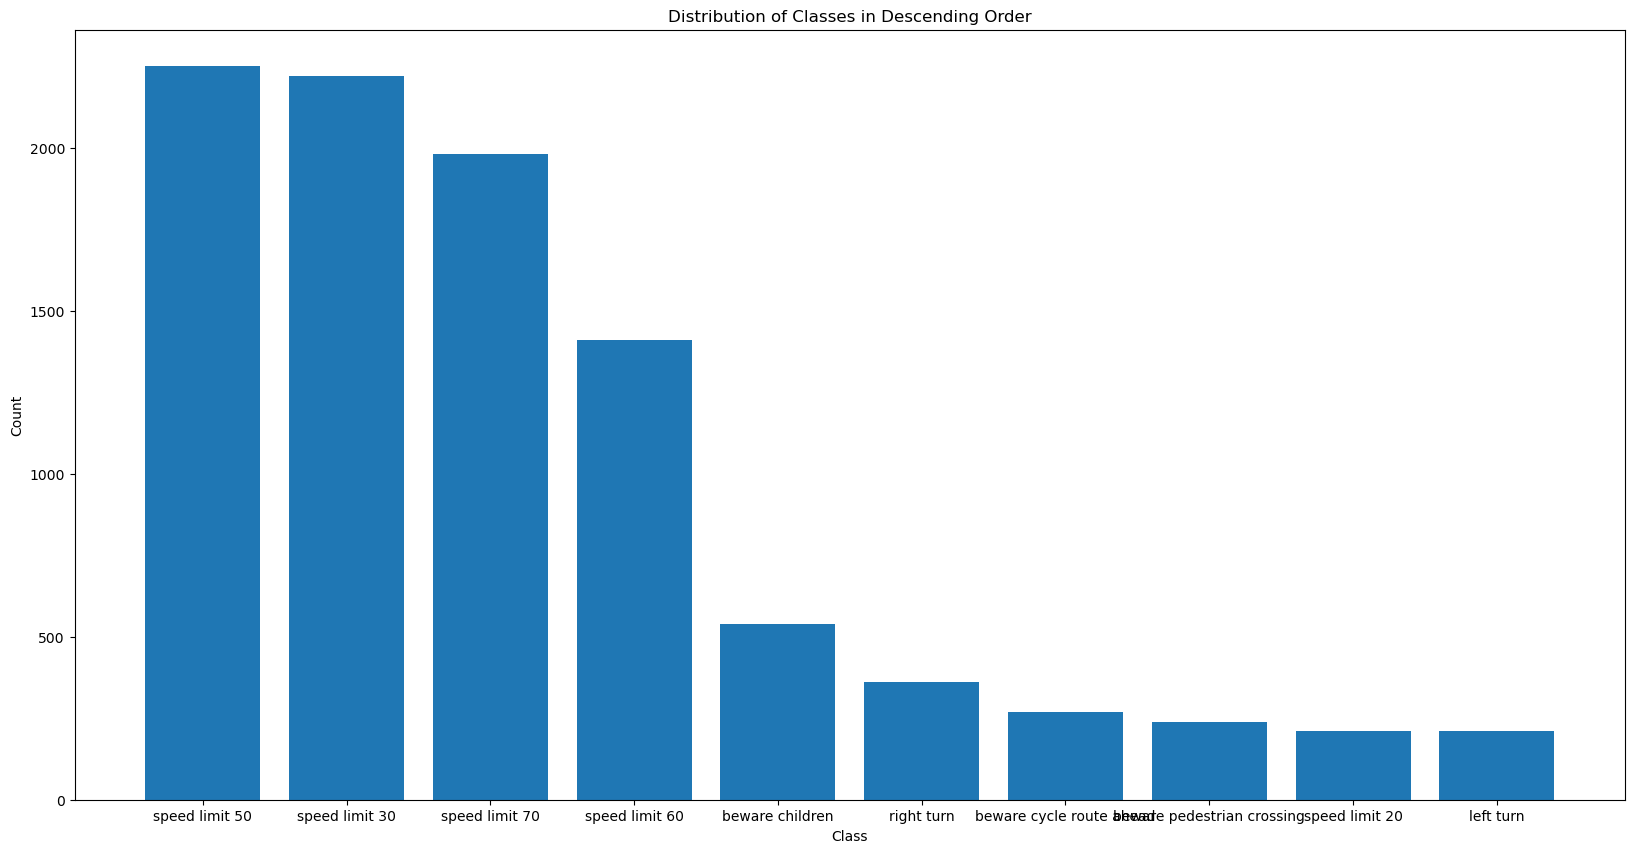

In [24]:
# show the distribution of the mapped target data
class_counts = data.iloc[:, 1].value_counts()
# Plot the distribution
plt.figure(figsize=(20, 10))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Descending Order')
plt.show()

In [25]:
# check the total number of missing values
data.isnull().sum().sum()

0

In [26]:
# Add the image processign bit here
def plot_images(instances, images_per_row=10, size = 48, **options):
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'gist_gray', **options)
    plt.axis("off")

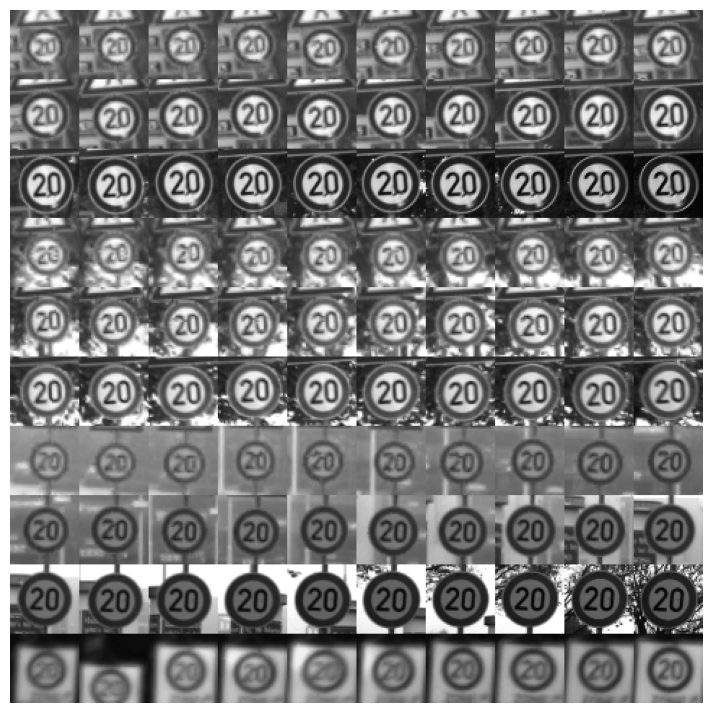

In [29]:
plt.figure(figsize=(9,9))
example_images = X_train.values[0:100]
plot_images(example_images, images_per_row=10)
plt.show()

What we learned:
- No missing values
- Imbalanced Data

#### Preprocessing

Attempting to reduce the size of the images to see if it will improve accuracy

In [13]:
# Apply the resize to the entire dataset
X_reduced = np.apply_along_axis(
    func1d=lambda img: cv2.resize(img.reshape(48, 48), dsize=(20, 20)),
    axis=1, arr=X_train).reshape(-1, 20*20)
X_reduced.shape

(9690, 400)

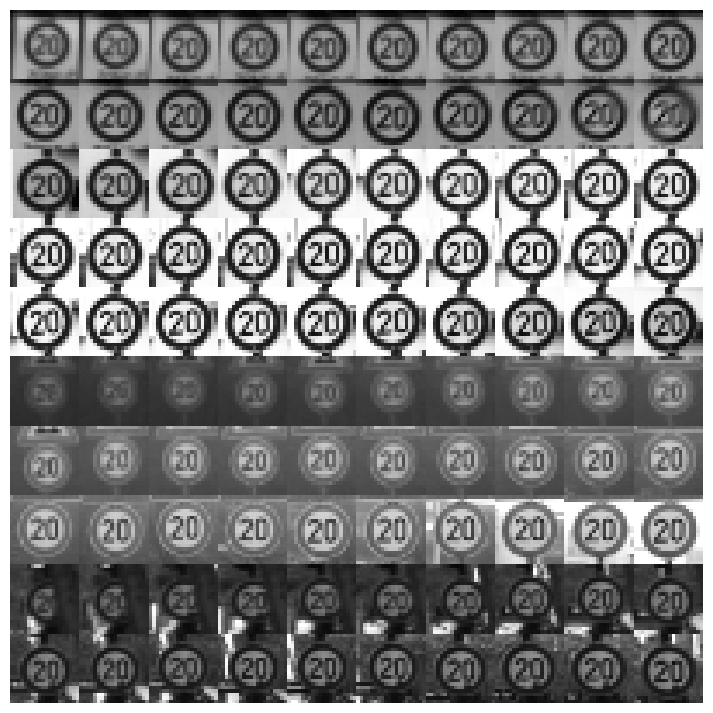

In [58]:
# viewing images after resizing
plt.figure(figsize=(9,9))
example_images = X_reduced[100:200]
plot_images(example_images, images_per_row=10, size=20)
plt.show()

Need to handle the imbalanced data by first undersampling the majority class and then oversampling the minority class.

In [5]:
%pip install scikit-learn==1.2

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Apply Under-Sampling to reduce the number of instances in the majority class
under_sampler = RandomUnderSampler()  # Adjust the undersampling ratio as needed
# Apply the RandomUnderSampler to your dataset
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Apply SMOTE to increase the number of instances in the minority class
over_sampler = SMOTE()  # Adjust the oversampling ratio as needed
# Apply the SMOTE to your dataset
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6000a013a0>
Traceback (most recent call last):
  File "/home/amv2/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/amv2/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/amv2/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/amv2/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

In [7]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Apply Under-Sampling to reduce the number of instances in the majority class
under_sampler = RandomUnderSampler()  # Adjust the undersampling ratio as needed
# Apply the RandomUnderSampler to your dataset
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Apply SMOTE to increase the number of instances in the minority class
over_sampler = SMOTE()  # Adjust the oversampling ratio as needed
# Apply the SMOTE to your dataset
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6004286340>
Traceback (most recent call last):
  File "/home/amv2/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/amv2/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/amv2/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/amv2/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

array([[<Axes: title={'center': '0'}>]], dtype=object)

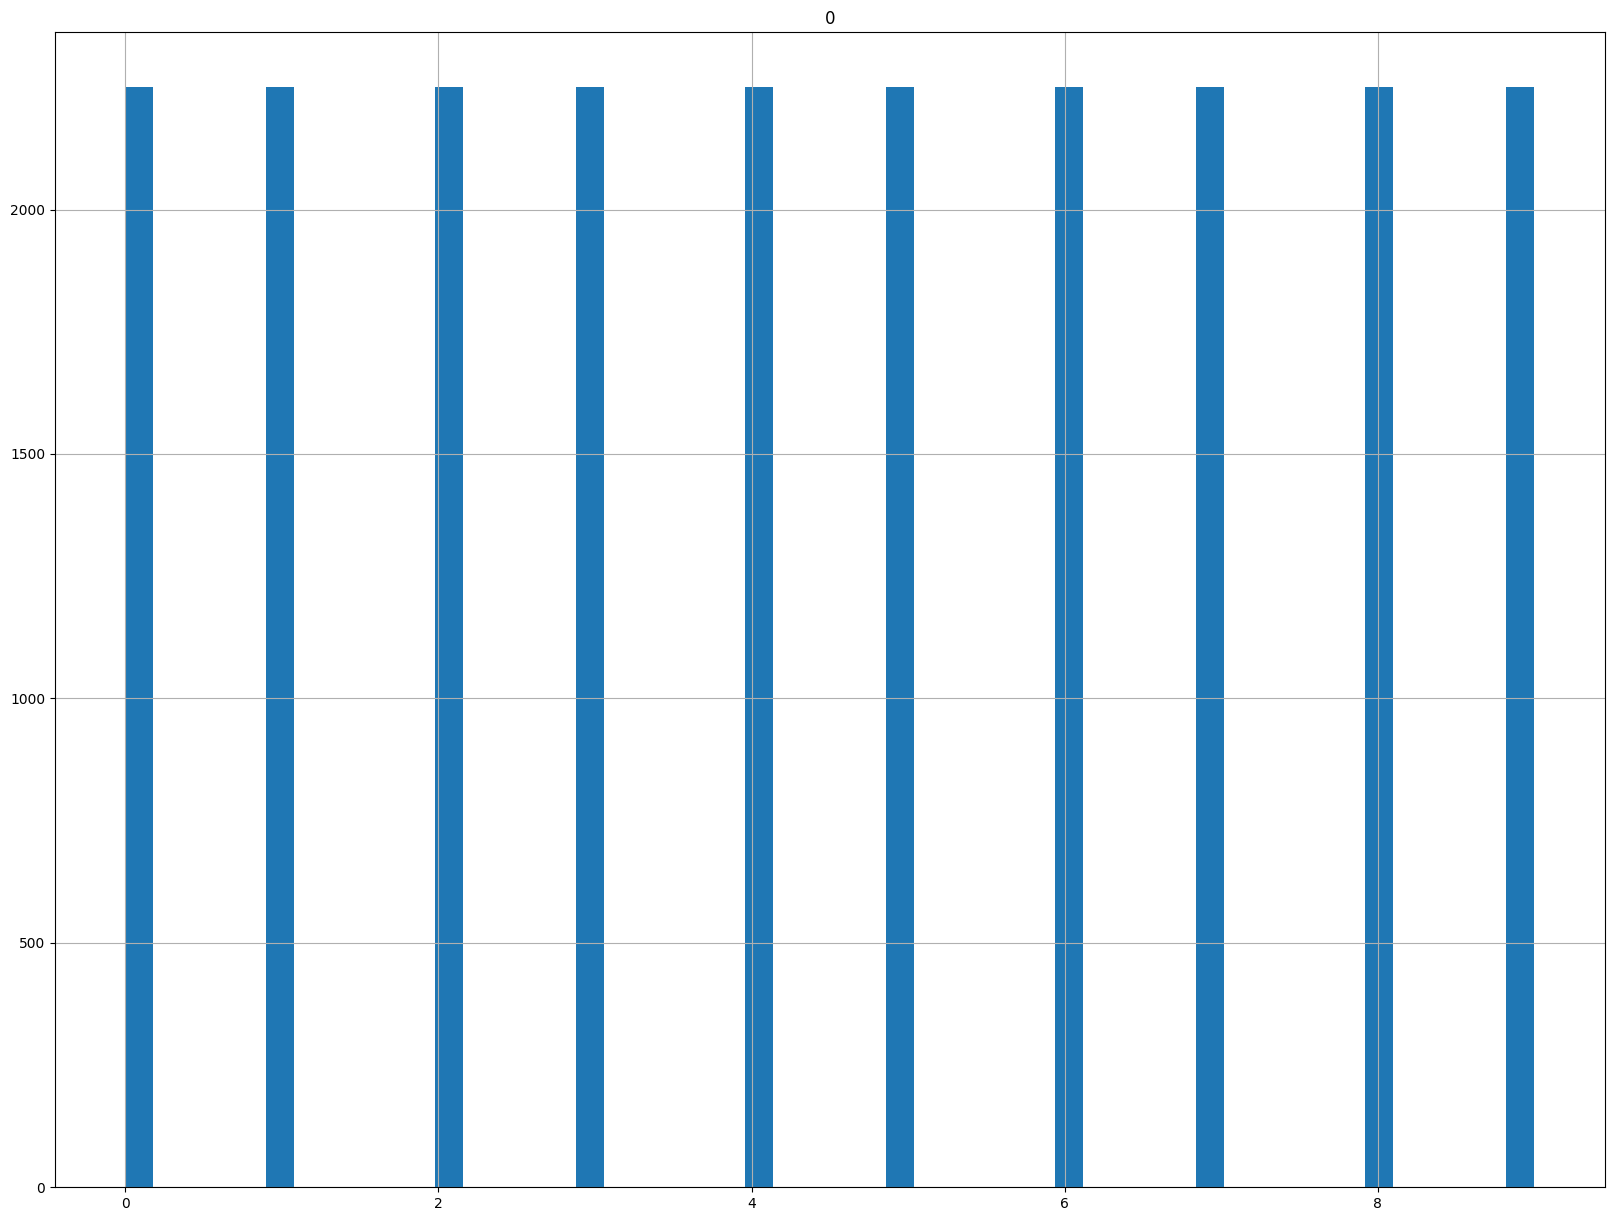

In [8]:
# show the distribution of the target class data

y_resampled.hist(bins=50, figsize=(20,15))

Data seems more balanced right now but we will have to see how it affects the accuracy of the model.

In [9]:
# checking to see how the shape of the data has changed after resampling
print(X_resampled.shape)
print(y_resampled.shape)

y_resampled

(22500, 2304)
(22500, 1)


,0
0,0
1,0
2,0
3,0
4,0
...,...
22495,9
22496,9
22497,9
22498,9


### Naïve Bayes Classifier

In [10]:
# create train test sets from the given dataset
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X_train, 
                                                                    y_train.values.ravel(), 
                                                                    test_size=.3, 
                                                                    random_state=42, 
                                                                    stratify=y_train)

In [11]:
# create train test sets from resampled dataset to compare
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_resampled, 
                                                                    y_resampled.values.ravel(), 
                                                                    test_size=.3, 
                                                                    random_state=42, 
                                                                    stratify=y_resampled)

In [14]:
# create train test sets from resampled dataset to compare
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_reduced, 
                                                                    y_train.values.ravel(), 
                                                                    test_size=.3, 
                                                                    random_state=42, 
                                                                    stratify=y_train)

In [15]:
# perform naive bayes with the Gaussian variant
naive_bayes_classification(model_type="GaussianNB", 
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test)

              precision    recall  f1-score   support

           0       0.14      0.68      0.23        63
           1       0.43      0.17      0.24       666
           2       0.43      0.19      0.26       675
           3       0.42      0.22      0.29       423
           4       0.48      0.15      0.23       594
           5       0.08      0.27      0.12        63
           6       0.08      0.69      0.15       108
           7       0.10      0.57      0.17        72
           8       0.47      0.21      0.29       162
           9       0.31      0.27      0.29        81

    accuracy                           0.22      2907
   macro avg       0.30      0.34      0.23      2907
weighted avg       0.41      0.22      0.25      2907

accuracy             : 0.22497
precision (micro)    : 0.22497
precision (macro)    : 0.29510
precision (weighted) : 0.40511
recall (micro)       : 0.22497
recall (macro)       : 0.34190
recall (weighted)    : 0.22497
F1 score (micro)     : 0

In [16]:
# perform naive bayes with the Bernoulli variant
naive_bayes_classification(model_type="BernoulliNB", 
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00       666
           2       0.23      1.00      0.38       675
           3       0.00      0.00      0.00       423
           4       0.00      0.00      0.00       594
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       108
           7       0.00      0.00      0.00        72
           8       0.00      0.00      0.00       162
           9       0.00      0.00      0.00        81

    accuracy                           0.23      2907
   macro avg       0.02      0.10      0.04      2907
weighted avg       0.05      0.23      0.09      2907

accuracy             : 0.23220
precision (micro)    : 0.23220
precision (macro)    : 0.02322
precision (weighted) : 0.05392
recall (micro)       : 0.23220
recall (macro)       : 0.10000
recall (weighted)    : 0.23220
F1 score (micro)     : 0

/tmp/ipykernel_277541/3197737376.py:51: RuntimeWarning: invalid value encountered in scalar divide
  tp_rate = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
/tmp/ipykernel_277541/3197737376.py:53: RuntimeWarning: invalid value encountered in scalar divide
  fp_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])


In [17]:
# perform naive bayes with the Multinomial variant
naive_bayes_classification(model_type="MultinomialNB", 
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test)

              precision    recall  f1-score   support

           0       0.11      0.44      0.17        63
           1       0.45      0.18      0.26       666
           2       0.44      0.33      0.37       675
           3       0.35      0.40      0.37       423
           4       0.45      0.66      0.54       594
           5       0.19      0.67      0.29        63
           6       0.32      0.21      0.26       108
           7       0.32      0.32      0.32        72
           8       0.45      0.25      0.32       162
           9       0.21      0.20      0.21        81

    accuracy                           0.37      2907
   macro avg       0.33      0.37      0.31      2907
weighted avg       0.40      0.37      0.36      2907

accuracy             : 0.36911
precision (micro)    : 0.36911
precision (macro)    : 0.32913
precision (weighted) : 0.40480
recall (micro)       : 0.36911
recall (macro)       : 0.36528
recall (weighted)    : 0.36911
F1 score (micro)     : 0

In [18]:
# perform naive bayes with the Complement variant
naive_bayes_classification(model_type="ComplementNB", 
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.51      0.16      0.25       666
           2       0.30      0.65      0.41       675
           3       0.23      0.51      0.31       423
           4       0.61      0.23      0.34       594
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       108
           7       0.00      0.00      0.00        72
           8       0.39      0.16      0.23       162
           9       0.00      0.00      0.00        81

    accuracy                           0.32      2907
   macro avg       0.21      0.17      0.15      2907
weighted avg       0.37      0.32      0.28      2907

accuracy             : 0.31923
precision (micro)    : 0.31923
precision (macro)    : 0.20506
precision (weighted) : 0.36823
recall (micro)       : 0.31923
recall (macro)       : 0.17181
recall (weighted)    : 0.31923
F1 score (micro)     : 0

In [19]:
# perform naive bayes with the Categorical variant
naive_bayes_classification(model_type="CategoricalNB", 
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test)

              precision    recall  f1-score   support

           0       0.15      0.59      0.25        63
           1       0.40      0.48      0.44       666
           2       0.34      0.35      0.35       675
           3       0.35      0.66      0.46       423
           4       0.59      0.16      0.25       594
           5       0.48      0.17      0.26        63
           6       0.54      0.32      0.40       108
           7       0.25      0.06      0.09        72
           8       0.74      0.20      0.31       162
           9       0.32      0.21      0.25        81

    accuracy                           0.37      2907
   macro avg       0.42      0.32      0.31      2907
weighted avg       0.43      0.37      0.35      2907

accuracy             : 0.36911
precision (micro)    : 0.36911
precision (macro)    : 0.41633
precision (weighted) : 0.43166
recall (micro)       : 0.36911
recall (macro)       : 0.32101
recall (weighted)    : 0.36911
F1 score (micro)     : 0

Running Naive Bayes Classifiers on the given Traffic Sign data proved to give fairly poor results. All accuracy measures were below 50% which is very poor for classification models. 
- Both Categorical and Multinomial Naive Bayes gave the best accuracy out of all the Naive Bayes models. This makes sense as the data is categorical and discrete, and these models are best suited for this type of data.
- Bernoulli Naive Bayes gave the worst accuracy out of all the Naive Bayes models. This is because the data is not binary and Bernoulli Naive Bayes is best suited for binary data.
- Gaussian Naive Bayes is not suited for this type of data as the data is not continuous and does not follow a Gaussian distribution.

#### Running Naive Bayes with Balanced Data

In [20]:
run_all_naive_bayes_models(X_train=X_train_rs, 
                           X_test=X_test_rs, 
                           y_train=y_train_rs, 
                           y_test=y_test_rs)



GaussianNB
              precision    recall  f1-score   support

           0       0.58      0.72      0.65       675
           1       0.36      0.24      0.29       675
           2       0.32      0.17      0.22       675
           3       0.44      0.20      0.28       675
           4       0.41      0.11      0.18       675
           5       0.32      0.18      0.23       675
           6       0.25      0.65      0.37       675
           7       0.21      0.58      0.31       675
           8       0.72      0.27      0.39       675
           9       0.50      0.27      0.35       675

    accuracy                           0.34      6750
   macro avg       0.41      0.34      0.33      6750
weighted avg       0.41      0.34      0.33      6750

accuracy             : 0.33985
precision (micro)    : 0.33985
precision (macro)    : 0.41112
precision (weighted) : 0.41112
recall (micro)       : 0.33985
recall (macro)       : 0.33985
recall (weighted)    : 0.33985
F1 score (m

Running the Naive Bayes models on the balanced data gave better results than the unbalanced data. However, the accuracy measures are still not very good. The best accuracy measure is 0.54 which is still very poor for a classification model.
- The best Naive Bayes model for the balanced data is Categorical Naive Bayes as the model is best suited for this type of data. The balanced dataset made the model more effective.
- Other Niave Bayes models also improved in accuracy but not by much. This is because the data is still not suited for these models.
- Bernoullis Naive Bayes reduced in accuracy as the data is not binary.

#### Running Naive Bayes with the reduced image sizes

In [21]:
print(X_train_sm.shape)
print(y_train_sm.shape)

(6783, 400)
(6783,)


In [29]:
X_train_sm = pd.DataFrame(X_train_sm)
X_test_sm = pd.DataFrame(X_test_sm)
y_train_sm = pd.DataFrame(y_train_sm)
y_test_sm = pd.DataFrame(y_test_sm)

In [40]:
naive_bayes_classification(model_type="CategoricalNB", 
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test)

              precision    recall  f1-score   support

           0       0.15      0.59      0.25        63
           1       0.40      0.48      0.44       666
           2       0.34      0.35      0.35       675
           3       0.35      0.66      0.46       423
           4       0.59      0.16      0.25       594
           5       0.48      0.17      0.26        63
           6       0.54      0.32      0.40       108
           7       0.25      0.06      0.09        72
           8       0.74      0.20      0.31       162
           9       0.32      0.21      0.25        81

    accuracy                           0.37      2907
   macro avg       0.42      0.32      0.31      2907
weighted avg       0.43      0.37      0.35      2907

accuracy             : 0.36911
precision (micro)    : 0.36911
precision (macro)    : 0.41633
precision (weighted) : 0.43166
recall (micro)       : 0.36911
recall (macro)       : 0.32101
recall (weighted)    : 0.36911
F1 score (micro)     : 0

### Form 3 Data Sets

In [41]:
# read the data from the 10 classes from OnevrsAll

y_test_0 = pd.read_csv("data/Traffic_Sign/OnevrsAll/0_vrs_all/y_test_0.csv")
y_train_0 = pd.read_csv("data/Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv")

y_test_1 = pd.read_csv("data/Traffic_Sign/OnevrsAll/1_vrs_all/y_test_1.csv")
y_train_1 = pd.read_csv("data/Traffic_Sign/OnevrsAll/1_vrs_all/y_train_1.csv")

y_test_2 = pd.read_csv("data/Traffic_Sign/OnevrsAll/2_vrs_all/y_test_2.csv")
y_train_2 = pd.read_csv("data/Traffic_Sign/OnevrsAll/2_vrs_all/y_train_2.csv")

y_test_3 = pd.read_csv("data/Traffic_Sign/OnevrsAll/3_vrs_all/y_test_3.csv")
y_train_3 = pd.read_csv("data/Traffic_Sign/OnevrsAll/3_vrs_all/y_train_3.csv")

y_test_4 = pd.read_csv("data/Traffic_Sign/OnevrsAll/4_vrs_all/y_test_4.csv")
y_train_4 = pd.read_csv("data/Traffic_Sign/OnevrsAll/4_vrs_all/y_train_4.csv")

y_test_5 = pd.read_csv("data/Traffic_Sign/OnevrsAll/5_vrs_all/y_test_5.csv")
y_train_5 = pd.read_csv("data/Traffic_Sign/OnevrsAll/5_vrs_all/y_train_5.csv")

y_test_6 = pd.read_csv("data/Traffic_Sign/OnevrsAll/6_vrs_all/y_test_6.csv")
y_train_6 = pd.read_csv("data/Traffic_Sign/OnevrsAll/6_vrs_all/y_train_6.csv")

y_test_7 = pd.read_csv("data/Traffic_Sign/OnevrsAll/7_vrs_all/y_test_7.csv")
y_train_7 = pd.read_csv("data/Traffic_Sign/OnevrsAll/7_vrs_all/y_train_7.csv")

y_test_8 = pd.read_csv("data/Traffic_Sign/OnevrsAll/8_vrs_all/y_test_8.csv")
y_train_8 = pd.read_csv("data/Traffic_Sign/OnevrsAll/8_vrs_all/y_train_8.csv")

y_test_9 = pd.read_csv("data/Traffic_Sign/OnevrsAll/9_vrs_all/y_test_9.csv")
y_train_9 = pd.read_csv("data/Traffic_Sign/OnevrsAll/9_vrs_all/y_train_9.csv")

In [15]:
# view the first and last 5 rows
print(y_train_0)
print(y_train_9)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
9685  1
9686  1
9687  1
9688  1
9689  1

[9690 rows x 1 columns]
      0
0     1
1     1
2     1
3     1
4     1
...  ..
9685  0
9686  0
9687  0
9688  0
9689  0

[9690 rows x 1 columns]


Finding the most correlating features of the first 3 classes before doing so for all classes

In [42]:
# set the number of classes to 3 temporarily for testing purposes
num_classes = 3
# create the correlations np array filled with zeros according to num of rows in X_train
correlations = np.zeros((X_train.shape[1], num_classes))
# loop through 3 classes and sort features by correlation
for i in range(num_classes):
    # access the class dynamically according to index
    class_label = eval(f'y_train_{i}')
    # safety check if the class label shape does not match the initial shape of y_train_0
    if class_label.shape != y_train_0.shape:  
        raise ValueError(f"The shape of y_train_{i} does not match the expected shape.")
    # calculate class specific correlations for each class
    correlations[:, i] = np.corrcoef(X_train, class_label, rowvar=False)[:X_train.shape[1], -1]

In [43]:
# sort the features by correlation
sorted_indices = np.argsort(np.abs(correlations), axis=0)[::-1]
# select the top features for each class
top_features = {i: sorted_indices[:20, i] for i in range(num_classes)}
# view the most correlating features for the first 3 classes
for class_label, features in top_features.items():
    print(f"For class {class_label}, the most correlating features are: {features}")

For class 0, the most correlating features are: [2261 2262 2263 2213 2260 2212 2214 2264 2215 2165 2216 2164 1979 2028
 2166 2027 2259 2025 2026 2211]
For class 1, the most correlating features are: [1073 1121 1120 1074 1072 1168 1025 1167 1026 1119 1216 1215 1263 1262
 1071 1214 1169 1310 1024 1264]
For class 2, the most correlating features are: [1316 1030 1317 1268 1269  982 1364 1315 1365 1031  981 1029 1363 1267
 1314  795  843  983 1563 1135]


In [44]:
# set the number of classes to the final value, 10
num_classes = 10
# create the correlations np array filled with zeros according to num of rows in X_train
correlations = np.zeros((X_train.shape[1], num_classes))
# loop through all 10 classes and sort features by correlation
for i in range(num_classes):
    # access the class dynamically according to index
    class_label = eval(f'y_train_{i}')
    # safety check if the class label shape does not match the initial shape of y_train_0
    if class_label.shape != y_train_0.shape:  
        raise ValueError(f"The shape of y_train_{i} does not match the expected shape.")
    # calculate class specific correlations for each class
    correlations[:, i] = np.corrcoef(X_train, class_label, rowvar=False)[:X_train.shape[1], -1]

In [45]:
# sort the features by correlation
sorted_indices = np.argsort(np.abs(correlations), axis=0)[::-1]
# select the top features for each class
top_features = {i: sorted_indices[:20, i] for i in range(num_classes)}
# view the most correlating features for all 10 classes
for class_label, features in top_features.items():
    print(f"For class {class_label}, the most correlating features are: {features}")

For class 0, the most correlating features are: [2261 2262 2263 2213 2260 2212 2214 2264 2215 2165 2216 2164 1979 2028
 2166 2027 2259 2025 2026 2211]
For class 1, the most correlating features are: [1073 1121 1120 1074 1072 1168 1025 1167 1026 1119 1216 1215 1263 1262
 1071 1214 1169 1310 1024 1264]
For class 2, the most correlating features are: [1316 1030 1317 1268 1269  982 1364 1315 1365 1031  981 1029 1363 1267
 1314  795  843  983 1563 1135]
For class 3, the most correlating features are: [1218 1265 1313 1266 1219 1361 1217 1312 1314 1171 1170 1360 1264 1362
 1267 1409 1220 1408 1172 1216]
For class 4, the most correlating features are: [ 983 1031 1030  982  935 2139 2138 2140 2095 2096 2141 2050 2186 2094
 2097 2049 2142 2270 2078 2269]
For class 5, the most correlating features are: [1743 1507 1744 1508 1742 1694 1695 1460 1714 1461 1761 1506 1459 1792
 1760 1762 1793 1713 1791 1808]
For class 6, the most correlating features are: [ 793  794  841  842  792  745 1134  795  744 

In [46]:
# create the data sets
datasets = []
# access the features and labels from the top features previously calculated
for class_label, features in top_features.items():
    # safety check to ensure we are not accessing invalid indexes
    if np.any(features >= X_train.shape[1]):
        raise ValueError(f"The feature index in y_train_{class_label} is out of bounds.")
    # extract selected features for each class
    class_data = X_train.iloc[:, features]
    # add class labels
    class_data = np.hstack((class_data, eval(f'y_train_{class_label}').values.reshape(-1, 1)))
    # append to the data sets array
    datasets.append(class_data)

In [47]:
# create the final datasets according to the top 5, 10, and 20 features for each class
dataset_1 = np.hstack([datasets[i][:, :5] for i in range(num_classes)])
dataset_2 = np.hstack([datasets[i][:, :10] for i in range(num_classes)])
dataset_3 = np.hstack([datasets[i][:, :20] for i in range(num_classes)])
# view the datasets
print("Dataset 1 (50 features):\n", dataset_1)
print("\nDataset 2 (100 features):\n", dataset_2)
print("\nDataset 3 (200 features):\n", dataset_3)

Dataset 1 (50 features):
 [[ 72.  71.  68. ... 226. 123. 231.]
 [ 85.  76.  70. ... 123. 185. 199.]
 [ 81.  71.  66. ... 208. 161. 225.]
 ...
 [ 29.  31.  30. ...  18.  19.  36.]
 [ 36.  37.  32. ...  17.  19.  25.]
 [ 32.  31.  33. ...  16.  15.  26.]]

Dataset 2 (100 features):
 [[ 72.  71.  68. ... 225. 224. 225.]
 [ 85.  76.  70. ... 232. 198. 231.]
 [ 81.  71.  66. ... 235. 220. 234.]
 ...
 [ 29.  31.  30. ...  40.  18.  48.]
 [ 36.  37.  32. ...  31.  16.  36.]
 [ 32.  31.  33. ...  29.  15.  36.]]

Dataset 3 (200 features):
 [[ 72.  71.  68. ... 176. 168. 162.]
 [ 85.  76.  70. ... 100.  95. 198.]
 [ 81.  71.  66. ... 153. 147. 215.]
 ...
 [ 29.  31.  30. ...  17.  17.  34.]
 [ 36.  37.  32. ...  16.  16.  36.]
 [ 32.  31.  33. ...  15.  14.  25.]]


In [48]:
# convert the data sets to pandas DataFrames
df_dataset_1 = pd.DataFrame(dataset_1)
df_dataset_2 = pd.DataFrame(dataset_2)
df_dataset_3 = pd.DataFrame(dataset_3)

In [44]:
# view the DataFrames
print("Data Set 1")
print(df_dataset_1)
print("\nData Set 2")
print(df_dataset_2)
print("\nData Set 3")
print(df_dataset_3)

Data Set 1
         0      1      2      3      4      5      6      7      8      9   \
0      72.0   71.0   68.0   73.0   73.0  174.0  197.0  207.0  163.0  184.0   
1      85.0   76.0   70.0   89.0   91.0  192.0  203.0  183.0  195.0  169.0   
2      81.0   71.0   66.0   92.0   90.0  191.0  207.0  211.0  179.0  196.0   
3      92.0   81.0   72.0  100.0   86.0  204.0  218.0  227.0  207.0  213.0   
4     126.0  127.0  128.0  138.0  123.0  162.0  170.0  178.0  150.0  163.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   41.0   42.0   42.0   42.0   40.0   18.0   20.0   18.0   47.0   18.0   
9686   36.0   35.0   32.0   36.0   36.0   18.0   33.0   18.0   78.0   17.0   
9687   29.0   31.0   30.0   30.0   33.0   19.0   45.0   17.0   83.0   17.0   
9688   36.0   37.0   32.0   36.0   39.0   16.0   31.0   16.0   77.0   16.0   
9689   32.0   31.0   33.0   34.0   37.0   16.0   31.0   15.0   76.0   15.0   

      ...     40     41     42     43     44     45 

### Naïve Bayes Classifier on 3 Data Sets

In [49]:
# create train test split data for data set 1
new_X_train_1, new_X_test_1, new_y_train_1, new_y_test_1 = train_test_split(df_dataset_1, 
                                                                            y_train.values.ravel(), 
                                                                            test_size=.3, 
                                                                            random_state=0)
# create train test split data for data set 2
new_X_train_2, new_X_test_2, new_y_train_2, new_y_test_2 = train_test_split(df_dataset_2, 
                                                                            y_train.values.ravel(), 
                                                                            test_size=.3, 
                                                                            random_state=0)
# create train test split data for data set 3
new_X_train_3, new_X_test_3, new_y_train_3, new_y_test_3 = train_test_split(df_dataset_3, 
                                                                            y_train.values.ravel(), 
                                                                            test_size=.3, 
                                                                            random_state=0)

In [50]:
# for data set 1
run_all_naive_bayes_models(X_train=new_X_train_1, 
                           X_test=new_X_test_1, 
                           y_train=new_y_train_1, 
                           y_test=new_y_test_1)



GaussianNB
              precision    recall  f1-score   support

           0       0.16      0.72      0.26        65
           1       0.53      0.34      0.42       650
           2       0.71      0.46      0.56       676
           3       0.33      0.69      0.45       426
           4       0.36      0.06      0.10       587
           5       0.61      0.15      0.24        74
           6       0.27      0.75      0.39       114
           7       0.44      0.34      0.38        71
           8       0.71      0.55      0.62       176
           9       0.16      0.57      0.25        68

    accuracy                           0.40      2907
   macro avg       0.43      0.46      0.37      2907
weighted avg       0.49      0.40      0.39      2907

accuracy             : 0.40041
precision (micro)    : 0.40041
precision (macro)    : 0.42764
precision (weighted) : 0.49133
recall (micro)       : 0.40041
recall (macro)       : 0.46291
recall (weighted)    : 0.40041
F1 score (m

/tmp/ipykernel_277541/3197737376.py:51: RuntimeWarning: invalid value encountered in scalar divide
  tp_rate = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
/tmp/ipykernel_277541/3197737376.py:53: RuntimeWarning: invalid value encountered in scalar divide
  fp_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])


In [51]:
# for data set 2
run_all_naive_bayes_models(X_train=new_X_train_2, 
                           X_test=new_X_test_2, 
                           y_train=new_y_train_2, 
                           y_test=new_y_test_2)



GaussianNB
              precision    recall  f1-score   support

           0       0.16      0.75      0.26        65
           1       0.52      0.34      0.41       650
           2       0.67      0.41      0.51       676
           3       0.33      0.58      0.42       426
           4       0.37      0.08      0.13       587
           5       0.50      0.14      0.21        74
           6       0.19      0.76      0.30       114
           7       0.36      0.38      0.37        71
           8       0.79      0.53      0.63       176
           9       0.19      0.62      0.29        68

    accuracy                           0.38      2907
   macro avg       0.41      0.46      0.35      2907
weighted avg       0.48      0.38      0.37      2907

accuracy             : 0.37599
precision (micro)    : 0.37599
precision (macro)    : 0.40764
precision (weighted) : 0.48053
recall (micro)       : 0.37599
recall (macro)       : 0.45759
recall (weighted)    : 0.37599
F1 score (m

/tmp/ipykernel_277541/3197737376.py:51: RuntimeWarning: invalid value encountered in scalar divide
  tp_rate = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
/tmp/ipykernel_277541/3197737376.py:53: RuntimeWarning: invalid value encountered in scalar divide
  fp_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])


In [52]:
# for data set 3
run_all_naive_bayes_models(X_train=new_X_train_3, 
                           X_test=new_X_test_3, 
                           y_train=new_y_train_3, 
                           y_test=new_y_test_3)



GaussianNB
              precision    recall  f1-score   support

           0       0.16      0.78      0.26        65
           1       0.52      0.32      0.40       650
           2       0.61      0.37      0.46       676
           3       0.33      0.46      0.38       426
           4       0.31      0.07      0.11       587
           5       0.50      0.12      0.20        74
           6       0.15      0.79      0.25       114
           7       0.35      0.39      0.37        71
           8       0.78      0.49      0.60       176
           9       0.19      0.66      0.29        68

    accuracy                           0.35      2907
   macro avg       0.39      0.45      0.33      2907
weighted avg       0.45      0.35      0.35      2907

accuracy             : 0.34503
precision (micro)    : 0.34503
precision (macro)    : 0.38813
precision (weighted) : 0.44969
recall (micro)       : 0.34503
recall (macro)       : 0.44626
recall (weighted)    : 0.34503
F1 score (m

/tmp/ipykernel_277541/3197737376.py:51: RuntimeWarning: invalid value encountered in scalar divide
  tp_rate = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
/tmp/ipykernel_277541/3197737376.py:53: RuntimeWarning: invalid value encountered in scalar divide
  fp_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])


              precision    recall  f1-score   support

           0       0.21      0.62      0.32        65
           1       0.50      0.58      0.54       650
           2       0.58      0.55      0.57       676
           3       0.36      0.78      0.50       426
           4       0.93      0.09      0.16       587
           5       0.81      0.30      0.44        74
           6       0.47      0.26      0.34       114
           7       0.65      0.48      0.55        71
           8       0.82      0.45      0.58       176
           9       0.39      0.75      0.51        68

    accuracy                           0.48      2907
   macro avg       0.57      0.48      0.45      2907
weighted avg       0.61      0.48      0.45      2907

accuracy             : 0.47609
precision (micro)    : 0.47609
precision (macro)    : 0.57346
precision (weighted) : 0.60683
recall (micro)       : 0.47609
recall (macro)       : 0.48438
recall (weighted)    : 0.47609
F1 score (micro)     : 0

### Additional Studies

We can add some feature selection tests

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

print(X_train.shape)
X_new = SelectKBest(f_classif, k=250).fit_transform(X_train, y_train.values.ravel())
print(X_new.shape, "\n")

# split the data into train and test sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X_new, y_train.values.ravel(), test_size=0.3, random_state=0)

naive_bayes_classification(model_type="MultinomialNB",
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

(9690, 2304)
(9690, 250) 

accuracy             : 0.65531
precision (micro)    : 0.65531
precision (macro)    : 0.61507
precision (weighted) : 0.72045
recall (micro)       : 0.65531
recall (macro)       : 0.62254
recall (weighted)    : 0.65531
F1 score (micro)     : 0.65531
F1 score (macro)     : 0.60071
F1 score (weighted)  : 0.67518
True Positive Rate   : 0.9931972789115646
False Positive Rate  : 0.02564102564102564


In [54]:
from sklearn.feature_selection import SelectPercentile, chi2

print(X_train.shape)
X_new = SelectPercentile(chi2, percentile=16).fit_transform(X_train, y_train.values.ravel())
print(X_new.shape, "\n")

# split the data into train and test sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X_new, y_train.values.ravel(), test_size=0.3, random_state=0)

naive_bayes_classification(model_type="MultinomialNB",
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

(9690, 2304)
(9690, 369) 

accuracy             : 0.55624
precision (micro)    : 0.55624
precision (macro)    : 0.53514
precision (weighted) : 0.63522
recall (micro)       : 0.55624
recall (macro)       : 0.54110
recall (weighted)    : 0.55624
F1 score (micro)     : 0.55624
F1 score (macro)     : 0.50918
F1 score (weighted)  : 0.56732
True Positive Rate   : 0.9612590799031477
False Positive Rate  : 0.125


In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

X_train_cpy = X_train.copy()
y_train_cpy = y_train.copy()

selector = SelectFromModel(estimator=LogisticRegression()).fit(X_train_cpy, y_train_cpy.values.ravel())
selector.estimator_.coef_
selector.threshold_
selector.get_support()
X_train_cpy = selector.transform(X_train_cpy)

/home/amv2/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X_train_cpy, y_train_cpy.values.ravel(), test_size=0.3, random_state=0)

naive_bayes_classification(model_type="CategoricalNB",
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

accuracy             : 0.44204
precision (micro)    : 0.44204
precision (macro)    : 0.63246
precision (weighted) : 0.61748
recall (micro)       : 0.44204
recall (macro)       : 0.46264
recall (weighted)    : 0.44204
F1 score (micro)     : 0.44204
F1 score (macro)     : 0.44006
F1 score (weighted)  : 0.41061
True Positive Rate   : 0.789010989010989
False Positive Rate  : 0.3050847457627119
